<a href="https://colab.research.google.com/github/dp-93/classification-Model/blob/main/Titanic_Survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Get a summary of the dataset (columns, data types, non-null counts)
print("--- Dataset Info ---")
df.info()

# Display the first 5 rows of the dataset
print("\n--- First 5 Rows ---")
print(df.head())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

--- First 5 Rows ---
   survived  pclass     sex   age  s

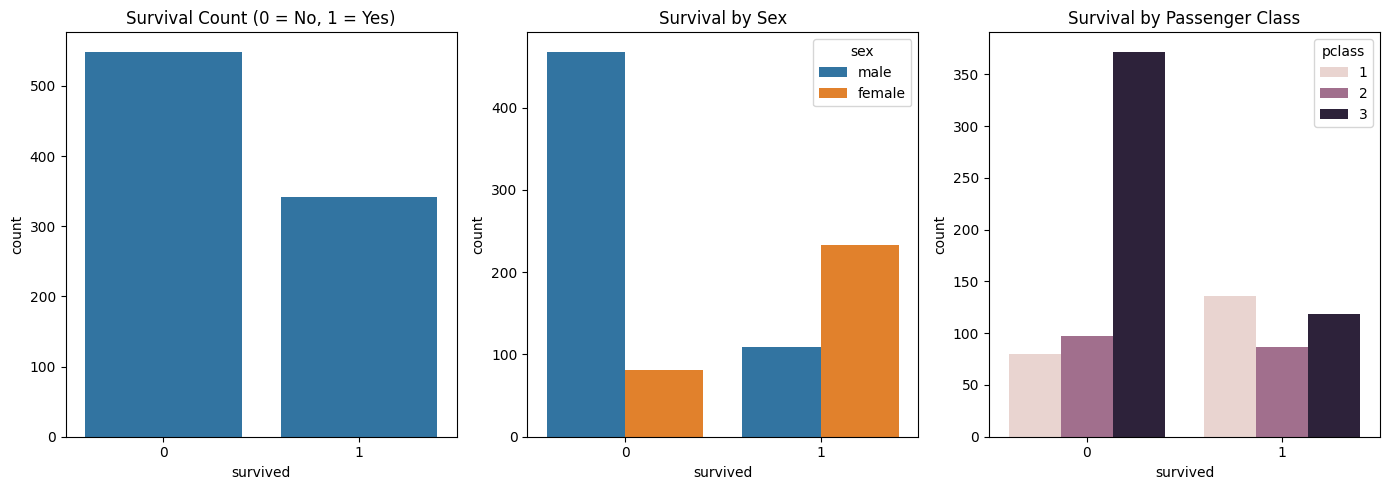

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(14, 5))

# --- Plot 1: Survival Count ---
plt.subplot(1, 3, 1) # (1 row, 3 columns, 1st plot)
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')

# --- Plot 2: Survival by Sex ---
plt.subplot(1, 3, 2)
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival by Sex')

# --- Plot 3: Survival by Passenger Class ---
plt.subplot(1, 3, 3)
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Survival by Passenger Class')

# Display the plots
plt.tight_layout() # Adjusts plots to prevent overlap
plt.show()

In [3]:
# Calculate the median age
median_age = df['age'].median()
print(f"The median age is: {median_age}")

# Fill missing 'age' values with the median age
# 'inplace=True' modifies the DataFrame directly
df['age'].fillna(median_age, inplace=True)

# Verify that the missing values are filled
print("\n--- Dataset Info After Cleaning 'age' ---")
df.info()

The median age is: 28.0

--- Dataset Info After Cleaning 'age' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/tmp/ipython-input-4196616765.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


In [4]:
# Convert the 'sex' column to numerical values
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

# Drop columns that we don't need for our model
columns_to_drop = ['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
df.drop(columns_to_drop, axis=1, inplace=True)

# We also need to convert 'embarked' to numbers, but it has missing values.
# For simplicity, we'll drop the rows with missing 'embarked' values.
df.dropna(inplace=True)

# Verify the changes by checking the first 5 rows and the info
print("--- First 5 Rows After Conversion ---")
print(df.head())

print("\n--- Final Dataset Info ---")
df.info()

--- First 5 Rows After Conversion ---
   survived  pclass  sex   age  sibsp  parch     fare embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S

--- Final Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [8]:
from sklearn.model_selection import train_test_split

# --- NEW STEP: Convert 'embarked' using one-hot encoding ---
# This creates new columns: embarked_Q, embarked_S (embarked_C is dropped to avoid redundancy)
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)


# Define our features (X) and target (y)
X = df.drop('survived', axis=1) # X is all columns except 'survived'
y = df['survived']               # y is only the 'survived' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new datasets to verify
print("--- Data is now fully numerical and split! ---")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

--- Data is now fully numerical and split! ---
Shape of X_train: (711, 8)
Shape of X_test: (178, 8)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Create the Logistic Regression model
# We add max_iter=200 to help the model converge and avoid a warning
model = LogisticRegression(max_iter=200)

# 2. Train the model on the training data
model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model on the test set: {accuracy * 100:.2f}%")

Accuracy of the model on the test set: 78.09%
